# Assignment 1 - FML (OPTION B: Python)
- Course: 64060 - Machine Learning and Data Analytics
- Dataset Source: GitHub Repository (flights.csv from seaborn-data)
- GitHub URL: https://raw.githubusercontent.com/zaratsian/Datasets/master/airlines.csv


In [1]:
!pip install nltk #Installing nltk for sentiment analysis

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import numpy as np
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


#Dataset Loading & Preview

In [2]:
url = "https://raw.githubusercontent.com/zaratsian/Datasets/master/airlines.csv"
df = pd.read_csv(url, encoding='latin1')
display(df.head())

,id,airline,date,location,rating,cabin,value,recommended,review
0,10001,Delta Air Lines,2015-06-21,Thailand,7,Economy,4,YES,Flew Mar 30 NRT to BKK. All flights were great...
1,10002,Delta Air Lines,2015-06-19,USA,0,Economy,2,NO,Flight 2463 leaving West Palm Beach (PBI) at 2...
2,10003,Delta Air Lines,2015-06-18,USA,0,Economy,1,NO,Delta Website froze 4 times trying to set up f...
3,10004,Delta Air Lines,2015-06-17,USA,9,Business,4,YES,I just returned from a round-trip First/Busine...
4,10005,Delta Air Lines,2015-06-17,Ecuador,7,Economy,3,YES,Round-trip flight from Quito Ecuador to Birmin...


# Descriptive Statistics

- Get statistics quantitative and qualatative fields.


In [3]:
df['rating'].describe().round(2) # Quantitative 1 - rounded to 2dp

,rating
count,992.00
mean,4.57
std,3.80
min,0.00
25%,1.00
50%,4.00
75%,8.00
max,10.00


In [4]:
df['value'].describe().round(2) #Quantitative 2 - rounded to 2dp

,value
count,992.00
mean,2.78
std,1.57
min,0.00
25%,1.00
50%,3.00
75%,4.00
max,5.00


In [5]:
df['location'].describe() #Qualatative 1

,location
count,992
unique,42
top,USA
freq,674


In [ ]:
df['airline'].describe() #Qualatative 2

,airline
count,992
unique,5
top,Delta Air Lines
freq,247


#Tranform Variables
- Ratings * 10 into ratings hundreds
- Convert reviews text into scores.

In [6]:
# Simple transfomation multiply by 10
df['raiting_hundreds'] = df['rating'] * 10

# Describe the transformed and round it to 2dp.
df['raiting_hundreds'].describe().round(2)

,raiting_hundreds
count,992.00
mean,45.72
std,38.03
min,0.00
25%,10.00
50%,40.00
75%,80.00
max,100.00


In [7]:
def get_vader_score(text):
    sid = SentimentIntensityAnalyzer()
    return sid.polarity_scores(text)['compound'] #Returns a score from -1 to 1

# Apply the function
df['review_score'] = df['review'].apply(get_vader_score)
df['review_score'].describe().round(2)


# Give a few examples of reviews and thier respective score
df[['review', 'review_score']].head(5)

,review,review_score
0,Flew Mar 30 NRT to BKK. All flights were great...,0.8360
1,Flight 2463 leaving West Palm Beach (PBI) at 2...,-0.4939
2,Delta Website froze 4 times trying to set up f...,-0.8020
3,I just returned from a round-trip First/Busine...,0.9801
4,Round-trip flight from Quito Ecuador to Birmin...,-0.4902


# Plotting
- Ratings Count - Bar Chart
- Average Review Scores Over Time for Delta Airlines- Scatter plot

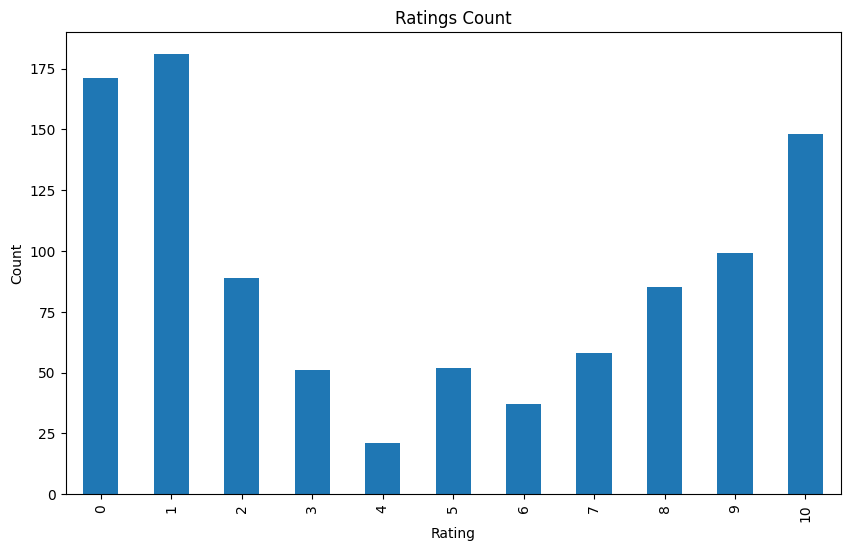

In [8]:
plt.figure(figsize=(10, 6))
df['rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Ratings Count')
plt.show()

In [9]:
df['date'] = pd.to_datetime(df['date'])

# For each record get its month-year based on its date.
df['month_year'] = df['date'].dt.strftime('%Y-%m')

# Get mean and create a new table for the month_year and its respective mean review _score
# Filter by delta airlines
delta_df = df[df['airline'] == 'Delta Air Lines']
monthly_review_scores = delta_df.groupby('month_year')['review_score'].mean().reset_index()
display(monthly_review_scores)

,month_year,review_score
0,2014-07,0.032217
1,2014-08,0.286129
2,2014-09,0.081247
3,2014-10,0.191745
4,2014-11,0.208875
5,2014-12,0.346930
6,2015-01,0.294195
7,2015-02,0.270059
8,2015-03,0.373885
9,2015-04,-0.041612


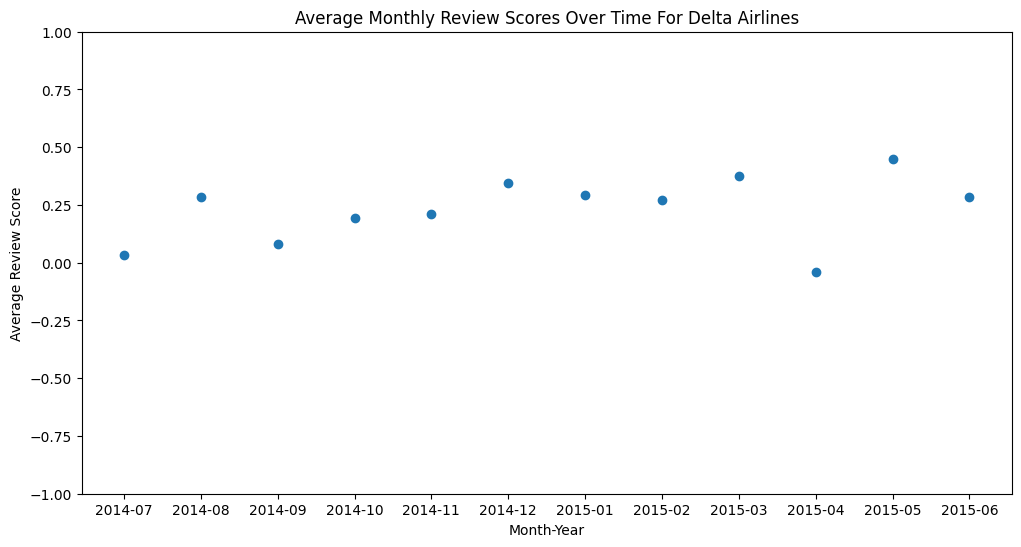

In [10]:
plt.figure(figsize=(12, 6))
plt.scatter(monthly_review_scores['month_year'], monthly_review_scores['review_score'])
plt.xlabel('Month-Year')
plt.ylabel('Average Review Score')
plt.ylim(-1, 1)
plt.title('Average Monthly Review Scores Over Time For Delta Airlines')
plt.show()